IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime


The goal of this Quest is to do a one step ahead forecast of the Miles Traveled data.
## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv". Figure out how to set the date to a datetime index columns

In [2]:
import requests
import os
import pandas as pd


def telecharger_et_charger_fichier(url, dossier_destination=None):
    """
    Télécharge un fichier depuis une URL donnée, le sauvegarde dans un dossier spécifié,
    Si le dossier n'existe pas il est crée
    Par defaut enregistre le fichier dans un repertoire ../datas qui est à la racine du projet
    et charge le fichier dans un DataFrame en fonction de son format.

    :param url: URL du fichier à télécharger.
    :param dossier_destination: Dossier de destination optionnel pour le fichier.
    :return: Tuple contenant le DataFrame original, sa copie, et le nom du fichier.
    """
    # Initialiser df_original et df à None
    df_original, df = None, None
    try:
        # Déterminer le nom du fichier à partir de l'URL
        nom_fichier = url.split('/')[-1]

        # Construire le chemin absolu du dossier de destination
        if dossier_destination is None:
            # Chemin par défaut relatif au script
            chemin_script = os.path.dirname(os.path.abspath(__file__))
            chemin_complet = os.path.join(
                chemin_script, "..", "datas", nom_fichier)
        else:
            # Utiliser le chemin de destination fourni
            chemin_complet = os.path.join(dossier_destination, nom_fichier)

        # Créer le dossier de destination s'il n'existe pas
        os.makedirs(os.path.dirname(chemin_complet), exist_ok=True)

        # Télécharger le fichier
        response = requests.get(url)
        response.raise_for_status()

        # Écrire le contenu dans le fichier de destination
        with open(chemin_complet, 'wb') as file:
            file.write(response.content)

        # Déterminer l'extension du fichier et charger dans un DataFrame
        extension = nom_fichier.split('.')[-1].lower()
        if extension in ['csv', 'txt']:
            df_original = pd.read_csv(chemin_complet, encoding='utf-8')
        elif extension == 'json':
            df_original = pd.read_json(
                chemin_complet, encoding='utf-8', orient='records')
        elif extension == 'xlsx':
            df_original = pd.read_excel(chemin_complet, index_col=0)
        else:
            print(f"Format de fichier non pris en charge : {extension}")

        # Faire une copie du DataFrame si celui-ci a été chargé
        if df_original is not None:
            df = df_original.copy()

        return df_original, df, chemin_complet

    except requests.HTTPError as http_err:
        print(f"Erreur HTTP lors du téléchargement du fichier : {http_err}")
        return None, None, None
    except Exception as err:
        print(
            f"Une erreur est survenue lors du téléchargement du fichier : {err}")
        return None, None, None


In [3]:
%%time
# Chargement du df
url="https://raw.githubusercontent.com/crajapax/GDAtrack3b/main/Miles_Traveled.csv"
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
# df_original, df, nom_fichier = telecharger_et_charger_csv(url)
df_original, df, nom_fichier = telecharger_et_charger_fichier( url, "datas/csv")


CPU times: total: 453 ms
Wall time: 1min 24s


In [4]:
# fichier déja enrefistré suer le disque
df_original = pd.read_csv('Miles_Traveled.csv')


In [6]:
df = df_original.copy()


In [7]:
df


,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173
1,1970-02-01,77442
2,1970-03-01,90223
3,1970-04-01,89956
4,1970-05-01,97972
...,...,...
569,2018-08-01,286608
570,2018-09-01,260595
571,2018-10-01,282174
572,2018-11-01,258590


In [8]:
# pd.read_csv(path, encoding='utf-8')
# Convertir l'index en datetime si ce n'est pas déjà le cas
df["DATE"] = pd.to_datetime(df['DATE'])


In [9]:
#  colonne date en index
df.set_index('DATE', inplace=True)


In [ ]:
df.describe


In [11]:
df.index


DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='DATE', length=574, freq=None)

In [14]:
# data = pd.read_csv(path)
# set the date as the index of our dataframe, ie. each of our datapoints correspond to a date
# df.set_index('DATE',parse_dates=True)
# df=data.copy()
# df.index.reset_index()
# df.index=df.index.freq('MS')

df.index.asfreq = 'MS'


In [15]:
df


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173
1970-02-01,77442
1970-03-01,90223
1970-04-01,89956
1970-05-01,97972
...,...
2018-08-01,286608
2018-09-01,260595
2018-10-01,282174


**Task: Change the column names to Value**

In [21]:
# CODE HERE
df.rename(columns={'TRFVOLUSM227NFWA': 'Value'}, inplace=True)
df


,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2018-08-01,286608.0
2018-09-01,260595.0
2018-10-01,282174.0


**TASK: Plot out the time series**

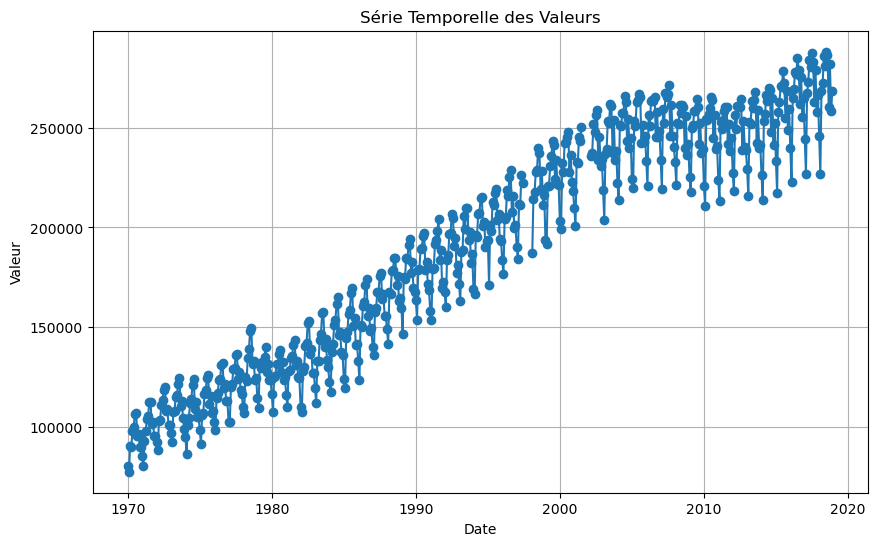

In [22]:
# CODE HERE
# Tracé de la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], marker='o')
plt.title('Série Temporelle des Valeurs')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.grid(True)
plt.show()


**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

<Figure size 1200x800 with 0 Axes>

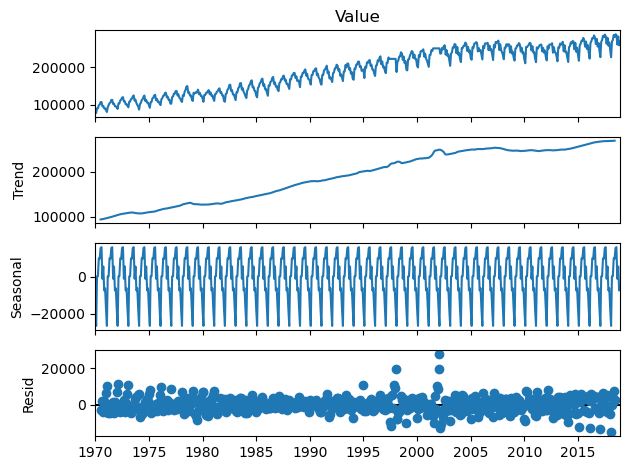

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Remplacer les valeurs manquantes par un remplissage vers l'avant
df_resampled_filled = df_resampled.fillna(method='ffill')

# Tentative de décomposition saisonnière à nouveau
decomposition_filled = seasonal_decompose(
    df_resampled_filled['Value'], model='additive')

# Tracer la décomposition saisonnière
plt.figure(figsize=(12, 8))
decomposition_filled.plot()
plt.show()


## Train Test Split

**TASK: Figure out the length of the data set**

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [29]:
df


,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2018-08-01,286608.0
2018-09-01,260595.0
2018-10-01,282174.0


In [68]:
# # Vérifier la forme de X_train
# print("Forme de X_train:", X_train.shape)

# # Vérifier si la date limite est appropriée
# print("Date limite:", date_limite)
# print("Dates maximales et minimales dans le DataFrame:",
#       df.index.max(), df.index.min())

# # Si X_train est vide, corrigez la division de vos données
# if X_train.shape[0] == 0:
#     print("X_train est vide. Vérifiez la division de vos données.")


Forme de X_train: (576, 0)
Date limite: 2017-12-01 00:00:00
Dates maximales et minimales dans le DataFrame: 2018-12-01 00:00:00 1970-01-01 00:00:00


In [69]:
# CODE HERE
# Importer la bibliothèque pandas
import pandas as pd

# S'assurer que les données sont triées par date
# df.sort_values(inplace=True)

# Définir une date un an (12 mois) avant la dernière date dans les données
date_limite = df.index.max() - pd.DateOffset(years=1)

# Créer les ensembles de données d'entraînement et de test
X_train = df[df.index <= date_limite]
X_test = df[df.index > date_limite]

# Séparer les valeurs cibles pour l'entraînement et le test
y_train = X_train['Value']
y_test = X_test['Value']

# Vous pouvez choisir de supprimer la colonne 'Value' de X_train et X_test si elle ne sert pas de caractéristique
# X_train = X_train.drop(columns=['Value'])
# X_test = X_test.drop(columns=['Value'])

# Enregistrer dans des fichiers
X_train.to_csv('train_Miles_Traveled.csv', encoding='utf-8')
X_test.to_csv('test_Miles_Traveled.csv', encoding='utf-8')
y_train.to_csv('y_train.csv', encoding='utf-8')
y_test.to_csv('y_test.csv', encoding='utf-8')


In [70]:
y_train


DATE
1970-01-01     80173.0
1970-02-01     77442.0
1970-03-01     90223.0
1970-04-01     89956.0
1970-05-01     97972.0
                ...   
2017-08-01    283184.0
2017-09-01    262673.0
2017-10-01    278937.0
2017-11-01    257712.0
2017-12-01    266535.0
Freq: MS, Name: Value, Length: 576, dtype: float64

In [71]:
X_train


,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2017-08-01,283184.0
2017-09-01,262673.0
2017-10-01,278937.0


In [72]:
# Calcul de la longueur du jeu de données
longueur_dataset = len(df)

longueur_dataset


588

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [89]:
from sklearn.preprocessing import MinMaxScaler

# Création du scaler, qui mettra les données à l'échelle entre 0 et 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Ajustement du scaler sur les données d'entraînement (X_train)
scaler.fit(X_train.values.reshape(-1, 1))

# Transformation des ensembles d'entraînement et de test (X)
X_train_scaled = scaler.transform(X_train.values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))

# Transformation des cibles (y)
y_train_scaled = scaler.transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Conversion des données mises à l'échelle en DataFrame pour une utilisation ultérieure
X_train_scaled_df = pd.DataFrame(
    X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(
    X_test_scaled, index=X_test.index, columns=X_test.columns)

# Conversion des cibles mises à l'échelle en DataFrame (si nécessaire)
y_train_scaled_df = pd.DataFrame(
    y_train_scaled, index=y_train.index, columns=['Value'])
y_test_scaled_df = pd.DataFrame(
    y_test_scaled, index=y_test.index, columns=['Value'])

    # Remplir les NaN par interpolation
train_scaled = pd.DataFrame(train_scaled).interpolate().values

# Vérification  si des valeurs NaN existent
print("NaN dans train_scaled après interpolation:", np.isnan(train_scaled).any())



NaN dans train_scaled après interpolation: False


In [91]:
train_scaled_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 576 entries, 1970-01-01 to 2017-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   562 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


# Time Series Generator

We Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12. n_input refers to the window size, ie. length of your sequence.
We want to do a one step ahead forecast.

In [92]:
train_scaled_df


,Value
DATE,
1970-01-01,0.013011
1970-02-01,0.000000
1970-03-01,0.060891
1970-04-01,0.059619
1970-05-01,0.097808
...,...
2017-08-01,0.980186
2017-09-01,0.882468
2017-10-01,0.959953


In [93]:
import numpy as np

# Vérifier si des valeurs NaN ou infinies existent
print("NaN dans train_scaled:", np.isnan(train_scaled).any())
print("Infini dans train_scaled:", np.isinf(train_scaled).any())

# Des valeurs NaN ou infinies sont trouvées, vous devez les traiter avant l'entraînement


NaN dans train_scaled: False
Infini dans train_scaled: False


In [43]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [94]:
n_input = 12  # you might need to test a variety of input values and test performance,
# but at least 12 to capture one cycle of seasonality

n_features = 1  # for univariate time series always 1

# Create input data from time series with generator object
# we put in the train data 2, once as actual train data, once as target variable, specify window length =n_input
# smaller batch sizes tend to work better
# CAREFUL: adjust the following 'scaled_train' to the name of your train object
generator = TimeseriesGenerator(
    train_scaled_df, train_scaled_df, sampling_rate=1, length=n_input, batch_size=1)

generator


TASK: inspect the output of the TimeSeriesGenerator

In [95]:
# Convertir train_scaled_df en numpy array
train_scaled_array = train_scaled_df.values

# Vérifier la forme
print("Forme de train_scaled_array:", train_scaled_array.shape)

# Recréer le TimeSeriesGenerator avec le numpy array
generator = TimeseriesGenerator(
    train_scaled_array, train_scaled_array, length=n_input, batch_size=1)

# Tenter d'itérer à nouveau sur les premiers lots
for i in range(2):
    x, y = generator[i]
    print(f"Lot {i+1}")
    print("X:", x)
    print("Y:", y)
    print('---' * 10)


Forme de train_scaled_array: (576, 1)
Lot 1
X: [[[0.0130109 ]
  [0.        ]
  [0.06089061]
  [0.05961858]
  [0.09780801]
  [0.10763646]
  [0.13792216]
  [0.14067108]
  [0.08485905]
  [0.08992334]
  [0.05832273]
  [0.0594042 ]]]
Y: [[0.03760821]]
------------------------------
Lot 2
X: [[[0.        ]
  [0.06089061]
  [0.05961858]
  [0.09780801]
  [0.10763646]
  [0.13792216]
  [0.14067108]
  [0.08485905]
  [0.08992334]
  [0.05832273]
  [0.0594042 ]
  [0.03760821]]]
Y: [[0.01274887]]
------------------------------


### Create the Model

Create a Keras Sequential Model with as many LSTM units as you want and a final Dense Layer.

In [103]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.initializers import GlorotUniform

# Initialisation du modèle séquentiel
model = Sequential()

# Ajout d'une couche LSTM
model.add(LSTM(50, activation='tanh', input_shape=(n_input, n_features), kernel_initializer=GlorotUniform()))

# Ajout de la couche Dense finale
model.add(Dense(1))

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 50)                10400     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
y_pred


array([[-1.0157431],
       [-1.0157431],
       [-1.0157431],
       [-1.0157431],
       [-1.0157431],
       [-1.0157431],
       [-1.0157431],
       [-1.0157431],
       [-1.0157431],
       [-1.0157431],
       [-1.0157431],
       [-1.0157431]], dtype=float32)

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Faire des prédictions
y_pred = model.predict(X_test)

# Calculer MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculer MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


1/1 [==============================] - 1s 556ms/step
Mean Squared Error (MSE): 72538331987.97372
Mean Absolute Percentage Error (MAPE): 0.9999973343767845


Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [105]:
# fit model
model.fit(generator, epochs=10)


Epoch 1/10


564/564 [==============================] - 4s 4ms/step - loss: nan
Epoch 2/10
564/564 [==============================] - 2s 3ms/step - loss: nan
Epoch 3/10
564/564 [==============================] - 2s 3ms/step - loss: nan
Epoch 4/10
564/564 [==============================] - 2s 3ms/step - loss: nan
Epoch 5/10
 16/564 [..............................] - ETA: 1s - loss: nan 

KeyboardInterrupt: 

**TASK: Plot the history of the loss that occured during training.**

In [83]:
# CODE HERE
import matplotlib.pyplot as plt

# Supposons que vous avez déjà formé votre modèle et enregistré l'historique
# history = model.fit(...)

# Extraire les valeurs de perte
loss = history.history['loss']

# Tracer le graphique de la perte
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.title('Historique de la perte durant l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()


NameError: name 'history' is not defined

dict_keys(['loss'])

# Evaluate on Test Data

Based on your test data and input size, create an appropriately sized "first evaluation batch"

In [84]:
first_eval_batch = scaled_train[-n_input:]


NameError: name 'scaled_train' is not defined

In [86]:
# Supposons que n_input est le nombre de pas de temps utilisés pour chaque séquence d'entrée
# et n_features est le nombre de caractéristiques par pas de temps

# Sélectionner les derniers points de données de l'ensemble d'entraînement
first_eval_batch = train_scaled[-n_input:]

# Redimensionner le lot pour correspondre au format attendu par le modèle
# Le nouveau format doit être [1, n_input, n_features]
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

# Maintenant, vous pouvez utiliser ce lot pour faire une première prédiction
first_pred = model.predict(first_eval_batch)


1/1 [==============================] - 1s 562ms/step


In [ ]:
first_eval_batch


array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [ ]:
# reshape the data to get it into the 3 dimensional shape needed for the keras model and model.predict()
# same dim as TimeSeriesGenerator output
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))


**TASK: predict the first point of the test dataset**

In [ ]:
# Code here


In [ ]:
#


## Now let's put this logic in a for loop to predict into the future for the entire test range.


**TASK: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [ ]:
# FORECAST USING RNN MODEL

# list for holding predictions
test_predictions = []


# how far into feature will you foreacst (here just len test)
for i in range(len(test)):

    # get prediction 1 time stamp ahead of historical 12 points ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store that  prediction
    test_predictions.append(current_pred)

    # update current batch to now include prediction and drop first value
    # append current prediction and this is all teh code we need to forecast into the future, ie. into the testset
    current_batch = np.append(current_batch[:, 1:, :], [
                              [current_pred]], axis=1)


## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions to retrieve back the original and not the scaled values**

In [ ]:
# invert scale to get back true predicted values!
# CODE HERE


array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [ ]:
# CODE HERE


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

In [ ]:
# CODE HERE


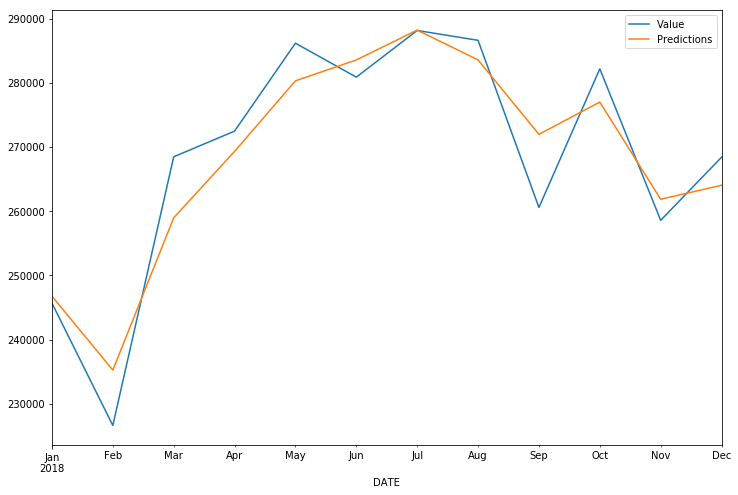

# Saving Models

**TASK: Optional, Save your model!**